# CHIPS-CVN Energy Estimation Notebook

In [1]:
import chipscvn.utils as utils
import chipscvn.config as config
import chipscvn.data as data
import chipscvn.models as models
import chipscvn.evaluators as evaluators
utils.gpu_setup()  # Setup the GPU's

---  3 Physical GPUs, 3 Logical GPUs ---


Load the trained model from the configuration, run the energy estimation evaluator and print the columns in the Pandas DataFrame.

In [2]:
conf = config.get("config/single_par.yml")
config.setup_dirs(conf, False)
evaluator = utils.get_evaluator(conf)
evaluator.run()
print(evaluator.events.columns)

--- Running Evaluation ---

--- 20.589893102645874 seconds to test model ---
Index(['true_pdg', 'true_type', 'true_category', 'true_vtxX', 'true_vtxY',
       'true_vtxZ', 'true_dirTheta', 'true_dirPhi', 'true_nuEnergy',
       'true_lepEnergy', 'raw_num_hits', 'filtered_num_hits',
       'num_hough_rings', 'raw_total_digi_q', 'filtered_total_digi_q',
       'first_ring_height', 'last_ring_height', 'reco_vtxX', 'reco_vtxY',
       'reco_vtxZ', 'reco_dirTheta', 'reco_dirPhi', 'pred_nuEnergy',
       'ct_image', 'h_image'],
      dtype='object')


In [3]:
evaluator.events.loc[:, 'pred_nuEnergy'] = evaluator.events.pred_nuEnergy.map(lambda x: x[0])

In [4]:
print(evaluator.events.size)
selection = evaluator.events[(evaluator.events["raw_total_digi_q"] >= 250.0)]
print(selection.size)
selection = selection[(selection["first_ring_height"] >= 250.0)]
print(selection.size)
selection = selection[(selection["reco_dirTheta"] >= -0.75)]
print(selection.size)
selection = selection[(selection["reco_dirTheta"] <= 0.75)]
print(selection.size)
selection = selection[(selection["reco_dirPhi"] <= 50)]
print(selection.size)
selection = selection[(selection["reco_dirPhi"] <= 50)]
print(selection.size)

478400
476575
475900
471900
467700
464525
464525


<Figure size 1152x720 with 0 Axes>

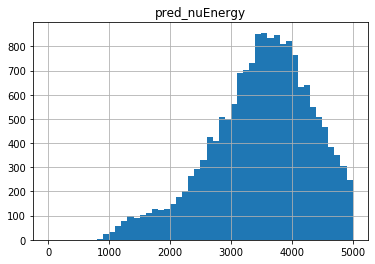

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
selection.hist(column='pred_nuEnergy', bins=50, range=[0,5000])
plt.show()

<Figure size 1152x720 with 0 Axes>

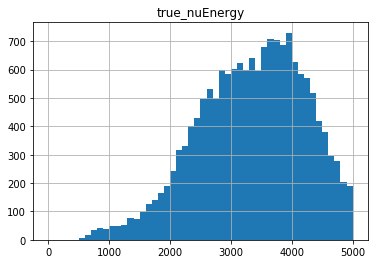

In [6]:
plt.figure(figsize=(16,10))
selection.hist(column='true_nuEnergy', bins=50, range=[0,5000])
plt.show()

In [7]:
def true_reco(row):
    return row["true_nuEnergy"]-row["pred_nuEnergy"]

evaluator.events['true_reco_nuEnergy'] = evaluator.events.apply(true_reco, axis=1)
selection['true_reco_nuEnergy'] = selection.apply(true_reco, axis=1)

<Figure size 1152x720 with 0 Axes>

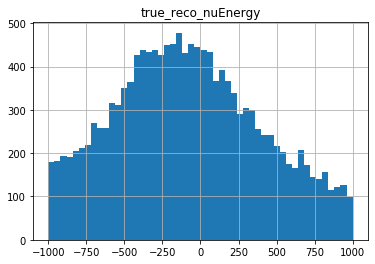

In [8]:
plt.figure(figsize=(16,10))
evaluator.events.hist(column='true_reco_nuEnergy', bins=50, range=[-1000,1000])
plt.show()

<Figure size 1152x720 with 0 Axes>

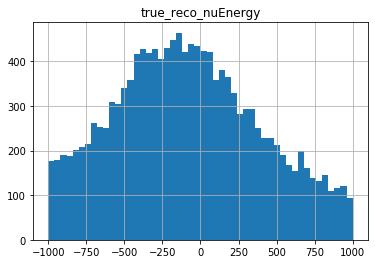

In [9]:
plt.figure(figsize=(16,10))
selection.hist(column='true_reco_nuEnergy', bins=50, range=[-1000,1000])
plt.show()

In [10]:
def true_reco_frac(row):
    return (row["true_nuEnergy"]-row["pred_nuEnergy"])/row["true_nuEnergy"]

evaluator.events['true_reco_frac_nuEnergy'] = evaluator.events.apply(true_reco_frac, axis=1)
selection['true_reco_frac_nuEnergy'] = selection.apply(true_reco_frac, axis=1)

<Figure size 1152x720 with 0 Axes>

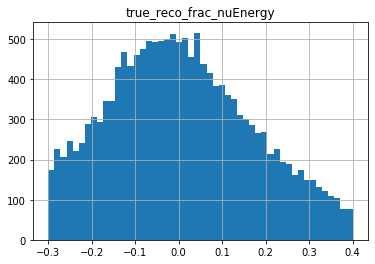

In [11]:
plt.figure(figsize=(16,10))
evaluator.events.hist(column='true_reco_frac_nuEnergy', bins=50, range=[-0.3,0.4])
plt.show()

<Figure size 1152x720 with 0 Axes>

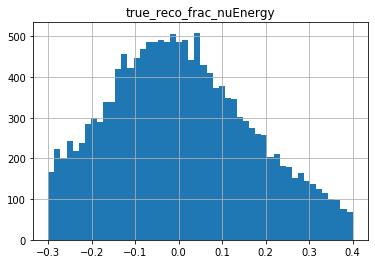

In [12]:
plt.figure(figsize=(16,10))
selection.hist(column='true_reco_frac_nuEnergy', bins=50, range=[-0.3,0.4])
plt.show()

In [13]:
from scipy.stats import norm
std_list = []
e_list = []
for energy in range(500,5000,500):
    upper = energy + 500
    subset = selection[(selection["true_nuEnergy"] >= energy)]
    subset = subset[(selection["true_nuEnergy"] <= upper)]
    mu, std = norm.fit(subset['true_reco_frac_nuEnergy'])
    std_list.append(std)
    e_list.append(energy+250)

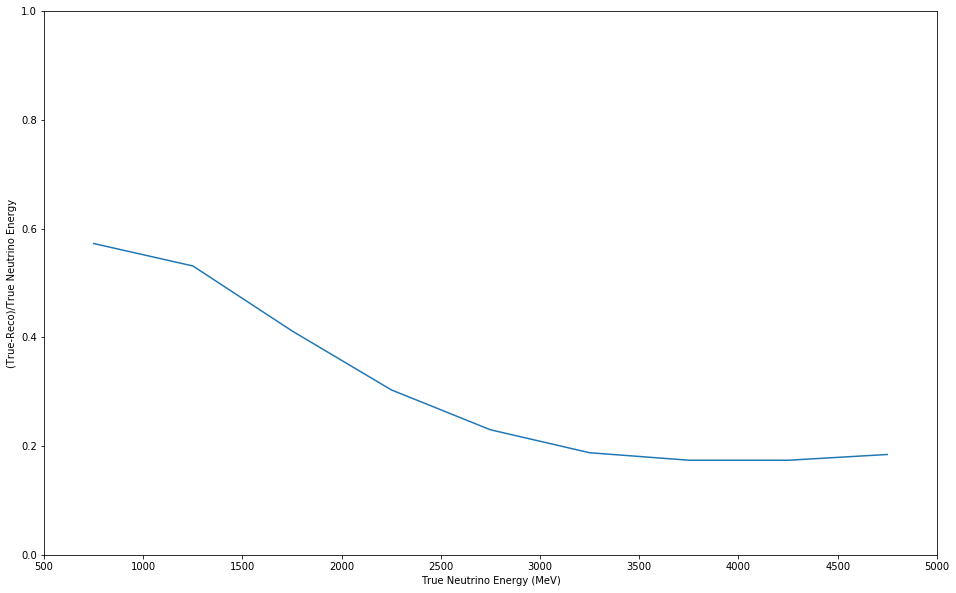

In [16]:
plt.figure(figsize=(16,10))
plt.plot(e_list, std_list)
plt.xlabel("True Neutrino Energy (MeV)")
plt.ylabel("(True-Reco)/True Neutrino Energy")
plt.xlim(500, 5000)
plt.ylim(0, 1)
plt.show()

In [15]:
print(e_list)
print(std_list)

[750, 1250, 1750, 2250, 2750, 3250, 3750, 4250, 4750]
[0.5726357609312007, 0.5313419612334652, 0.4118199289891605, 0.3034171423668263, 0.2299670917820593, 0.18774670381826875, 0.1739888969833453, 0.1739273890513692, 0.18452421432251642]
